# Exploratory Data Analysis (EDA) - Grupo Boticário

## Objetivo
Realizar uma análise exploratória dos dados para identificar padrões, tendências e insights que auxiliem o time estratégico a tomar decisões relacionadas a promoções e produtos.

---

## Estrutura do Notebook

1. **Carregamento de Dados**
   - Importação do dataset.
   - Verificação da integridade dos dados (valores ausentes, duplicados, etc.).

2. **Análise Descritiva**
   - Estatísticas descritivas das variáveis numéricas.
   - Frequências e distribuições das variáveis categóricas.

3. **Exploração de Promoções**
   - Análise do impacto das promoções nas vendas reais.
   - Comparação entre preços base e preços praticados.
   - Investigação dos descontos aplicados.

4. **Análise por Categoria e Região**
   - Identificação de padrões por categoria de produto, subcategoria e estado.
   - Análise de performance por canal de venda.

5. **Visualizações**
   - Criação de gráficos para representar distribuições, correlações e tendências.

6. **Insights Preliminares**
   - Identificação dos fatores mais relevantes para o impacto das promoções.
   - Sugestões iniciais para otimizar estratégias promocionais.

---

## Informações sobre os Dados
- **Nome do Arquivo**: `sales.csv`
- **Colunas**:
  - `cod_ciclo`: Ciclo (período de mensuração).
  - `cod_ano`: Ano de referência.
  - `cod_canal`: Canal de vendas.
  - `cod_agrupador_sap_material`: Código do produto.
  - `cod_uf`: Estado.
  - `des_categoria_material`: Categoria do produto.
  - `des_subcategoria_material`: Subcategoria do produto.
  - `des_marca_material`: Marca do produto.
  - `des_mecanica_consumidor`: Descrição da promoção para o consumidor.
  - `des_mecanica_rev`: Descrição da promoção para a revendedora.
  - `des_promocao_publico`: Público-alvo da promoção.
  - `vlr_venda_base`: Valor de receita baseline (sem promoção).
  - `vlr_rbv_tabela_so_tt`: Valor de receita total considerando o preço cheio.
  - `vlr_rbv_real_so_tt`: Valor de receita real praticada.
  - `vlr_preco_base`: Preço unitário do produto de tabela.
  - `vlr_preco_venda`: Preço unitário do produto praticado.

---

In [1]:
%reload_kedro

                    INFO     Resolved project path as: /Users/joaopedroc.dias/Desktop/case_gb.      ]8;id=88867;file:///Users/joaopedroc.dias/Desktop/case_gb/.venv/lib/python3.9/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=488852;file:///Users/joaopedroc.dias/Desktop/case_gb/.venv/lib/python3.9/site-packages/kedro/ipython/__init__.py#178\178]8;;\
                             To set a different path, run '%reload_kedro <project_root>'                           

                    INFO     Kedro is sending anonymous usage data with the sole purpose of improving ]8;id=653569;file:///Users/joaopedroc.dias/Desktop/case_gb/.venv/lib/python3.9/site-packages/kedro_telemetry/plugin.py\plugin.py]8;;\:]8;id=349983;file:///Users/joaopedroc.dias/Desktop/case_gb/.venv/lib/python3.9/site-packages/kedro_telemetry/plugin.py#233\233]8;;\
                             the product. No personal data or IP addresses are stored on our side. If              
                             you want to opt out, set the `KEDRO_DISABLE_TELEMETRY` or `DO_NOT_TRACK`              
                             environment variables, or create a `.telemetry` file in the current                   
                             working directory with the contents `consent: false`. Read more at                    
                             https://docs.kedro.org/en/stable/configuration/telemetry.html                         

                    INFO     Kedro project promo-sales-insights                                     ]8;id=227397;file:///Users/joaopedroc.dias/Desktop/case_gb/.venv/lib/python3.9/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=389569;file:///Users/joaopedroc.dias/Desktop/case_gb/.venv/lib/python3.9/site-packages/kedro/ipython/__init__.py#144\144]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=628973;file:///Users/joaopedroc.dias/Desktop/case_gb/.venv/lib/python3.9/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=58612;file:///Users/joaopedroc.dias/Desktop/case_gb/.venv/lib/python3.9/site-packages/kedro/ipython/__init__.py#145\145]8;;\
                             'pipelines'                                                                           

                    INFO     Registered line magic 'run_viz'                                        ]8;id=931840;file:///Users/joaopedroc.dias/Desktop/case_gb/.venv/lib/python3.9/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=846879;file:///Users/joaopedroc.dias/Desktop/case_gb/.venv/lib/python3.9/site-packages/kedro/ipython/__init__.py#151\151]8;;\

In [2]:
# Bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Carregamento de Dados com o Kedro

## O que é o Catálogo do Kedro?

O catálogo do Kedro é um componente central que abstrai o gerenciamento de dados no projeto. Ele permite definir fontes de dados de forma centralizada e reutilizável, especificando configurações como:
- Tipo do dataset (e.g., CSV, SQL, Parquet).
- Caminho para os arquivos ou conexões de banco de dados.
- Parâmetros adicionais, como separadores, formatos decimais e encodings.

Com o catálogo, você não precisa carregar dados manualmente em cada etapa do pipeline. Basta referenciá-los pelo nome definido no arquivo de configuração (`catalog.yml`), e o Kedro cuidará do restante.

---

## Estrutura do Catálogo

No arquivo `conf/base/catalog.yml`, você define as configurações para os datasets do projeto. Por exemplo:

```yaml
sales:
  type: pandas.CSVDataset
  filepath: data/01_raw/sales.csv
  load_args:
    sep: ","
    decimal: "."
    encoding: "utf-8"


In [3]:
catalog.list()

['sales', 'parameters']

In [4]:
sales = catalog.load('sales')

[12/23/24 00:48:54] INFO     Loading data from sales (CSVDataset)...                            ]8;id=220245;file:///Users/joaopedroc.dias/Desktop/case_gb/.venv/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=64270;file:///Users/joaopedroc.dias/Desktop/case_gb/.venv/lib/python3.9/site-packages/kedro/io/data_catalog.py#389\389]8;;\

In [5]:
sales.head()

,cod_ciclo,cod_ano,cod_canal,cod_agrupador_sap_material,cod_uf,des_categoria_material,des_subcategoria_material,des_marca_material,des_mecanica_consumidor,des_mecanica_rev,des_promocao_publico,vlr_desconto_real,vlr_rbv_tabela_so_tt,vlr_rbv_real_so_tt,vlr_preco_base,vlr_preco_venda
0,201916,2019.0,Anon2,13488.501226,Anon3,Anon2,Anon2,Anon2,Anon12,Anon1,Anon1,8495.257045,19999.884318,11504.627273,30.211268,17.328639
1,202308,2023.0,Anon1,15699.180973,Anon1,Anon1,Anon1,Anon2,Anon5,Anon4,Anon3,6.940910,76.118643,69.177734,23.169014,21.056338
2,202309,2023.0,Anon1,19406.783582,Anon2,Anon1,Anon1,Anon5,Anon3,Anon1,Anon2,0.000000,35378.973671,35378.973671,126.690141,126.690141
3,202303,2023.0,Anon2,19412.567674,Anon1,Anon1,Anon1,Anon5,Anon10,Anon1,Anon1,19.943547,9968.881588,9948.938041,80.915493,80.776995
4,202201,2022.0,Anon1,23459.118042,Anon1,Anon1,Anon1,Anon5,Anon3,Anon1,Anon2,196.740086,2856.762760,2660.022674,31.619718,29.373239


In [6]:
# Informações básicas sobre o dataset
sales.info()

# Verificar valores ausentes
missing_values = sales.isnull().sum()
print("Valores ausentes:\n", missing_values)

# Estatísticas descritivas para variáveis numéricas
sales.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19502 entries, 0 to 19501
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   cod_ciclo                   19502 non-null  int64  
 1   cod_ano                     19490 non-null  float64
 2   cod_canal                   19502 non-null  object 
 3   cod_agrupador_sap_material  19502 non-null  float64
 4   cod_uf                      19502 non-null  object 
 5   des_categoria_material      19502 non-null  object 
 6   des_subcategoria_material   19502 non-null  object 
 7   des_marca_material          19502 non-null  object 
 8   des_mecanica_consumidor     19502 non-null  object 
 9   des_mecanica_rev            19502 non-null  object 
 10  des_promocao_publico        19502 non-null  object 
 11  vlr_desconto_real           19486 non-null  float64
 12  vlr_rbv_tabela_so_tt        19502 non-null  float64
 13  vlr_rbv_real_so_tt          195

,cod_ciclo,cod_ano,cod_agrupador_sap_material,vlr_desconto_real,vlr_rbv_tabela_so_tt,vlr_rbv_real_so_tt,vlr_preco_base,vlr_preco_venda
count,19502.000000,19490.000000,1.950200e+04,19486.000000,1.950200e+04,19502.000000,19502.000000,19502.000000
mean,202142.777818,2021.290713,5.340477e+07,3415.137413,2.334965e+04,19938.368995,58.332265,52.552794
std,138.764724,1.402607,7.455351e+09,13838.920875,5.283581e+04,41514.595127,93.646982,26.654832
min,201801.000000,2018.000000,1.312063e+04,0.000000,0.000000e+00,18.057933,17.535211,4.330986
25%,202016.000000,2020.000000,1.568530e+04,0.000000,2.310745e+03,2129.800796,37.253521,33.670188
50%,202202.000000,2022.000000,1.873930e+04,71.387256,7.520129e+03,6876.220443,52.746479,45.704225
75%,202217.000000,2022.000000,2.247351e+04,1228.679839,2.225556e+04,19643.902411,73.873239,66.435446
max,202311.000000,2023.000000,1.041137e+12,477861.436306,1.270311e+06,906703.195132,12522.957746,140.774648


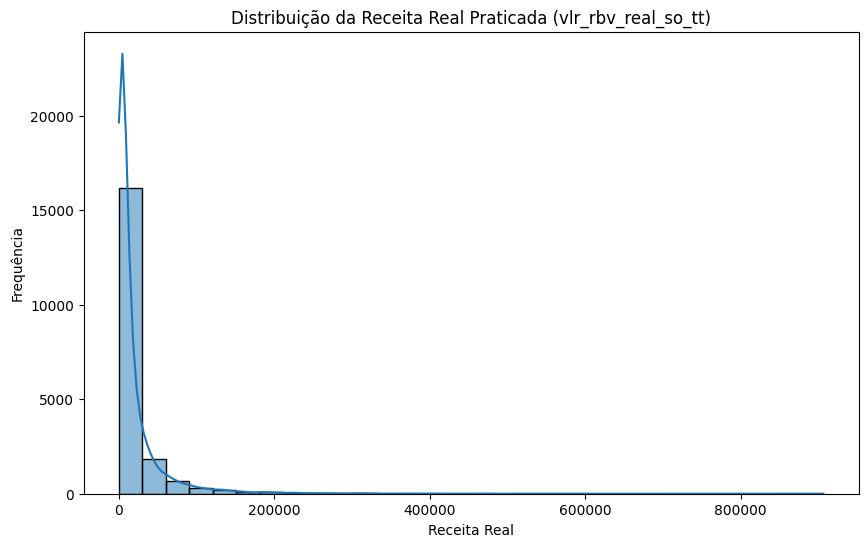

In [7]:
# Plot da distribuição
plt.figure(figsize=(10, 6))
sns.histplot(sales['vlr_rbv_real_so_tt'], kde=True, bins=30)
plt.title('Distribuição da Receita Real Praticada (vlr_rbv_real_so_tt)')
plt.xlabel('Receita Real')
plt.ylabel('Frequência')
plt.show()


count    19502.000000
mean         8.633711
std         11.455710
min         -0.023068
25%          0.000000
50%          1.334322
75%         19.805667
max         99.635036
Name: desconto_percentual, dtype: float64


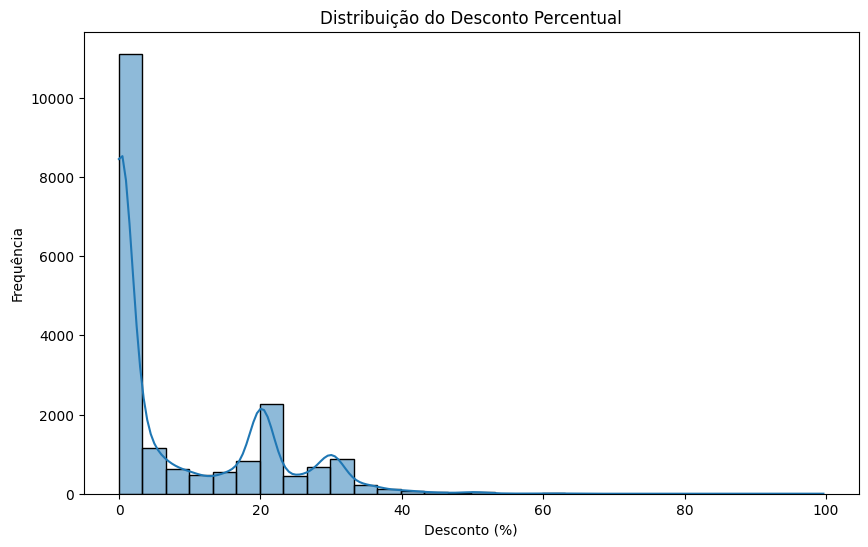

In [8]:
# Calcular o desconto percentual
sales['desconto_percentual'] = (sales['vlr_preco_base'] - sales['vlr_preco_venda']) / sales['vlr_preco_base'] * 100

# Estatísticas básicas sobre o desconto
print(sales['desconto_percentual'].describe())

# Visualizar a distribuição dos descontos
plt.figure(figsize=(10, 6))
sns.histplot(sales['desconto_percentual'], kde=True, bins=30)
plt.title('Distribuição do Desconto Percentual')
plt.xlabel('Desconto (%)')
plt.ylabel('Frequência')
plt.show()


count    19502.000000
mean         8.633711
std         11.455710
min         -0.023068
25%          0.000000
50%          1.334322
75%         19.805667
max         99.635036
Name: desconto_percentual, dtype: float64


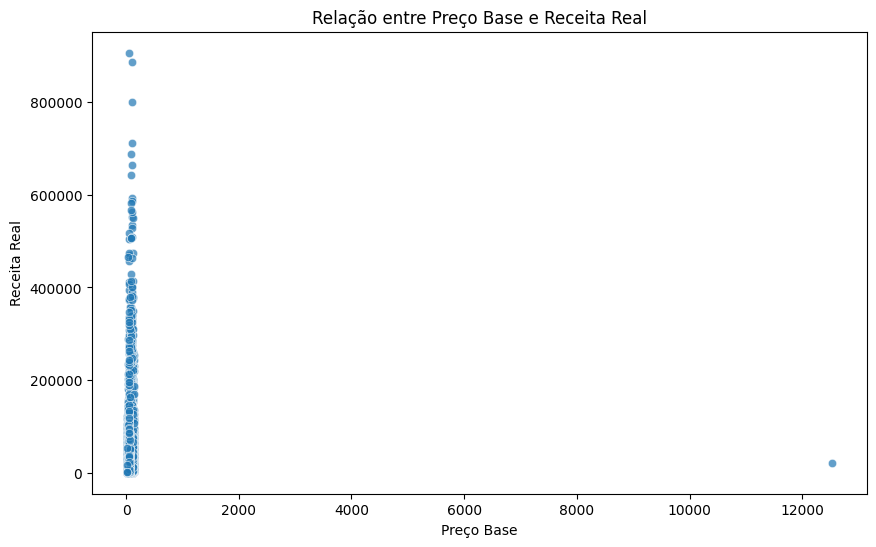

In [9]:
# Criar uma nova variável para o desconto percentual
sales['desconto_percentual'] = (sales['vlr_preco_base'] - sales['vlr_preco_venda']) / sales['vlr_preco_base'] * 100

# Estatísticas descritivas do desconto percentual
print(sales['desconto_percentual'].describe())

# Visualizar a relação entre preços e receita
plt.figure(figsize=(10, 6))
sns.scatterplot(x='vlr_preco_base', y='vlr_rbv_real_so_tt', data=sales, alpha=0.7)
plt.title('Relação entre Preço Base e Receita Real')
plt.xlabel('Preço Base')
plt.ylabel('Receita Real')
plt.show()

In [10]:
sales['vlr_preco_base'].min(), sales['vlr_preco_base'].max()

(np.float64(17.5352112676056), np.float64(12522.9577464789))

## Exploração da Relação entre Preço Base e Receita Real

Durante a análise inicial, observamos que a relação entre o preço base (`vlr_preco_base`) e a receita real (`vlr_rbv_real_so_tt`) apresenta desafios que dificultam a interpretação dos dados:

### Problemas Identificados:
1. **Amplitude do Intervalo de Preços**:
   - Os valores de `vlr_preco_base` variam entre **17.54** e **12522.96**, abrangendo uma faixa muito ampla.
   - A maioria dos preços parece estar concentrada em valores mais baixos, enquanto valores extremos estão distorcendo a visualização.

2. **Concentração de Dados**:
   - Grande parte dos preços está agrupada em faixas próximas ao limite inferior, criando alta densidade em uma pequena área do gráfico.

3. **Presença de Outliers**:
   - Valores no limite superior (próximos a 12,522.96) podem ser considerados outliers e impactam negativamente a escala do gráfico.

### Abordagem Proposta:
Para melhorar a visualização e entender melhor a relação entre as variáveis, aplicaremos as seguintes técnicas:
1. **Escala Logarítmica**:
   - Transformar o eixo X para uma escala logarítmica, o que permitirá espalhar os valores próximos ao zero e visualizar melhor a concentração.

2. **Filtro de Outliers**:
   - Filtrar os dados para incluir apenas os valores entre os percentis 1 e 99, removendo os extremos para focar nos dados mais representativos.

3. **Agrupamento em Faixas (Bins)**:
   - Categorizar os preços base em intervalos (bins) definidos com base no intervalo mínimo e máximo para observar padrões gerais.

4. **Adição de Linha de Tendência**:
   - Adicionar uma linha de tendência para destacar a relação geral entre o preço base e a receita real.

Com essas estratégias, esperamos revelar padrões mais claros, eliminando a influência de valores extremos e destacando insights relevantes para a análise.


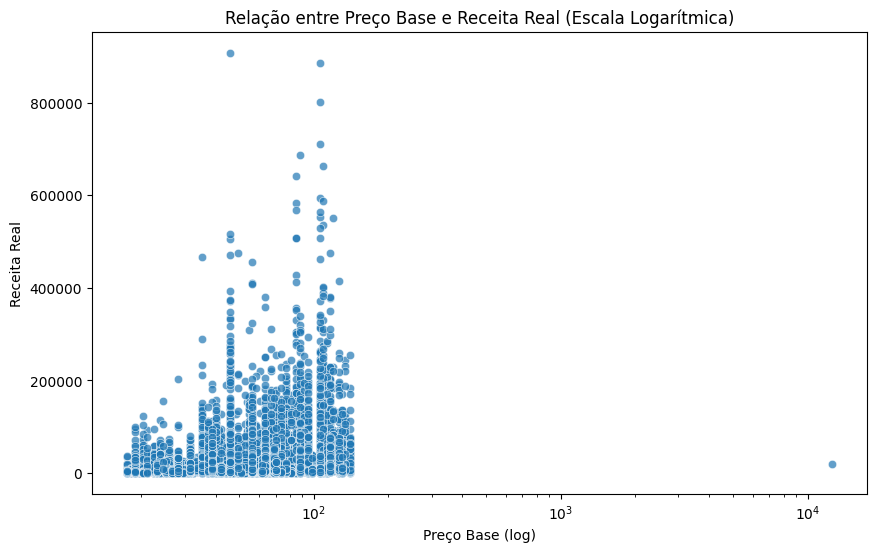

In [11]:
# Replotando com escala logarítmica no eixo X
plt.figure(figsize=(10, 6))
sns.scatterplot(x='vlr_preco_base', y='vlr_rbv_real_so_tt', data=sales, alpha=0.7)
plt.xscale('log')
plt.title('Relação entre Preço Base e Receita Real (Escala Logarítmica)')
plt.xlabel('Preço Base (log)')
plt.ylabel('Receita Real')
plt.show()


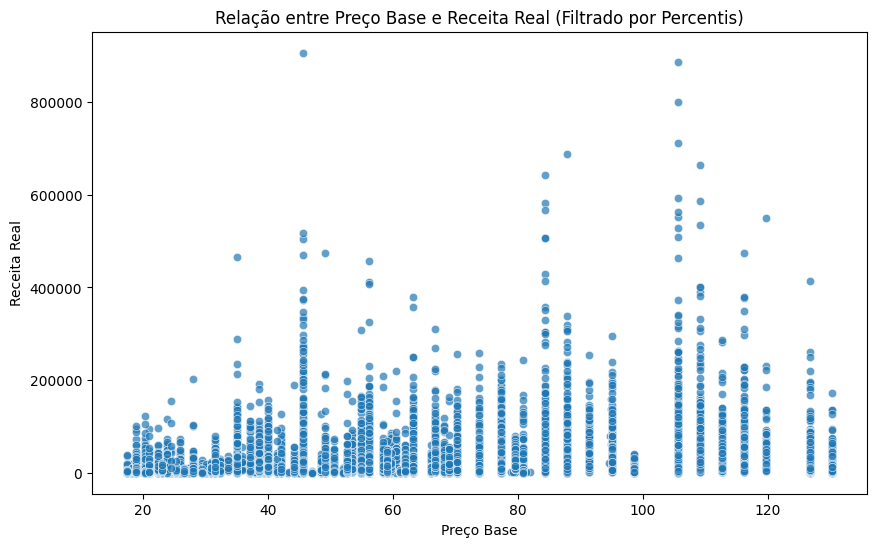

In [12]:
# Calcular os percentis para limitar os dados
low_percentile = sales['vlr_preco_base'].quantile(0.01)
high_percentile = sales['vlr_preco_base'].quantile(0.99)

# Filtrar dados entre os percentis 1% e 99%
filtered_sales = sales[(sales['vlr_preco_base'] >= low_percentile) & (sales['vlr_preco_base'] <= high_percentile)]

# Replotando os dados filtrados
plt.figure(figsize=(10, 6))
sns.scatterplot(x='vlr_preco_base', y='vlr_rbv_real_so_tt', data=filtered_sales, alpha=0.7)
plt.title('Relação entre Preço Base e Receita Real (Filtrado por Percentis)')
plt.xlabel('Preço Base')
plt.ylabel('Receita Real')
plt.show()


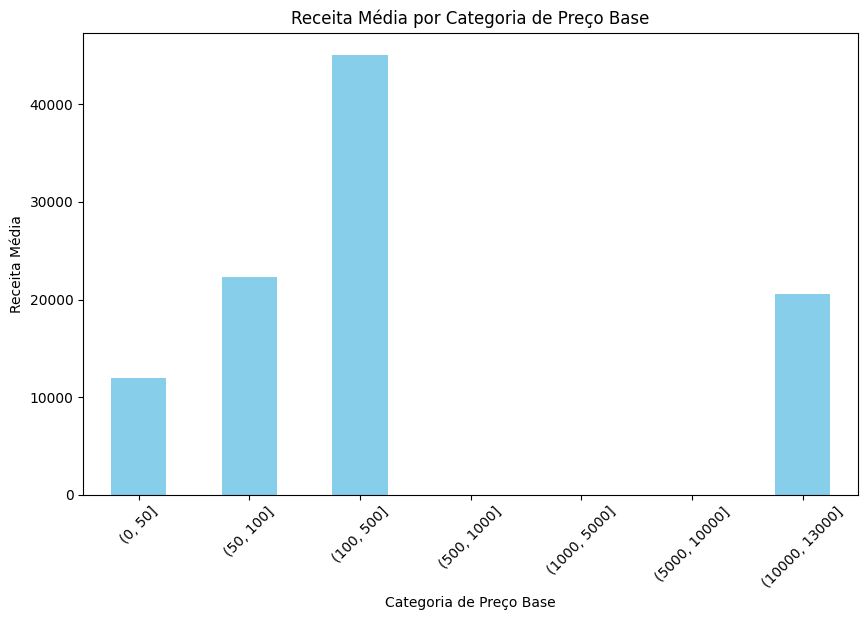

In [13]:
# Criar bins baseados nos valores mínimo e máximo
bins = [0, 50, 100, 500, 1000, 5000, 10000, 13000]
sales['preco_categoria'] = pd.cut(sales['vlr_preco_base'], bins=bins)

# Calcular a receita média por categoria de preço
preco_grouped = sales.groupby('preco_categoria')['vlr_rbv_real_so_tt'].mean()

# Visualizar o agrupamento em faixas
preco_grouped.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Receita Média por Categoria de Preço Base')
plt.xlabel('Categoria de Preço Base')
plt.ylabel('Receita Média')
plt.xticks(rotation=45)
plt.show()


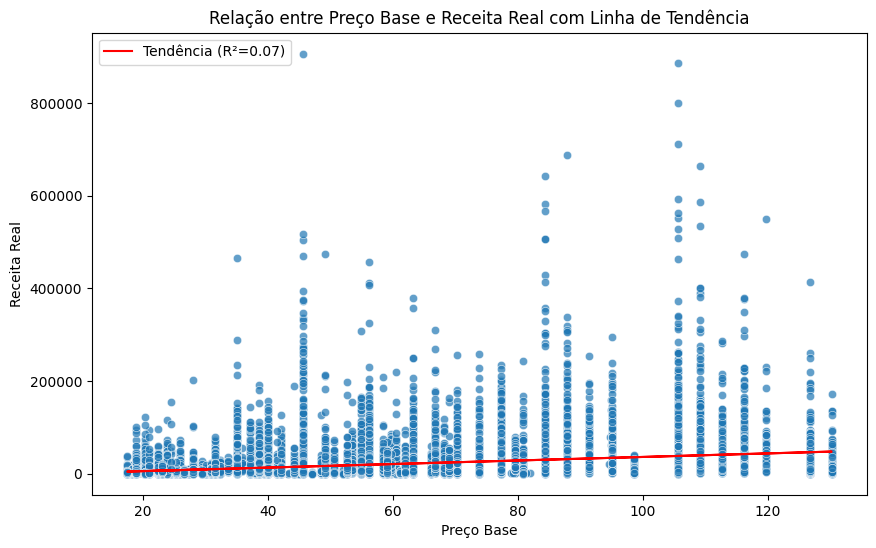

In [14]:
from scipy.stats import linregress

# Calcular a linha de tendência para os dados filtrados
slope, intercept, r_value, p_value, std_err = linregress(
    filtered_sales['vlr_preco_base'], filtered_sales['vlr_rbv_real_so_tt']
)

# Criar os valores da linha de tendência
filtered_sales['tendencia'] = slope * filtered_sales['vlr_preco_base'] + intercept

# Plotar os dados com a linha de tendência
plt.figure(figsize=(10, 6))
sns.scatterplot(x='vlr_preco_base', y='vlr_rbv_real_so_tt', data=filtered_sales, alpha=0.7)
plt.plot(filtered_sales['vlr_preco_base'], filtered_sales['tendencia'], color='red', label=f'Tendência (R²={r_value**2:.2f})')
plt.title('Relação entre Preço Base e Receita Real com Linha de Tendência')
plt.xlabel('Preço Base')
plt.ylabel('Receita Real')
plt.legend()
plt.show()


## Conclusões da Análise

### 1. Relação Linear (Linha de Tendência)
- A inclinação é **383.16**, indicando um aumento médio de 383.16 na receita real (`vlr_rbv_real_so_tt`) para cada unidade de aumento no preço base (`vlr_preco_base`).
- O coeficiente de determinação (**R²**) é **0.065**, sugerindo uma relação linear fraca entre preço base e receita real.

### 2. Categorias de Preço (Receita Média)
- Intervalos mais representativos:
  - **0-50**: Receita média de **11,970.44**.
  - **50-100**: Receita média de **22,332.22**.
  - **100-500**: Receita média de **45,061.00**.
- Faixas acima de **500** carecem de dados para análise.

### 3. Percentis Utilizados
- Limites:
  - **1%**: **17.54**.
  - **99%**: **130.21**.
- Valores extremos foram removidos, focando nos dados mais representativos.

### Observações
- A relação entre preço base e receita real é fraca, indicando que outros fatores (promoções, categorias, regiões) devem ter maior impacto.
- Faixas de preço entre **50-500** mostraram maior aumento na receita.

---

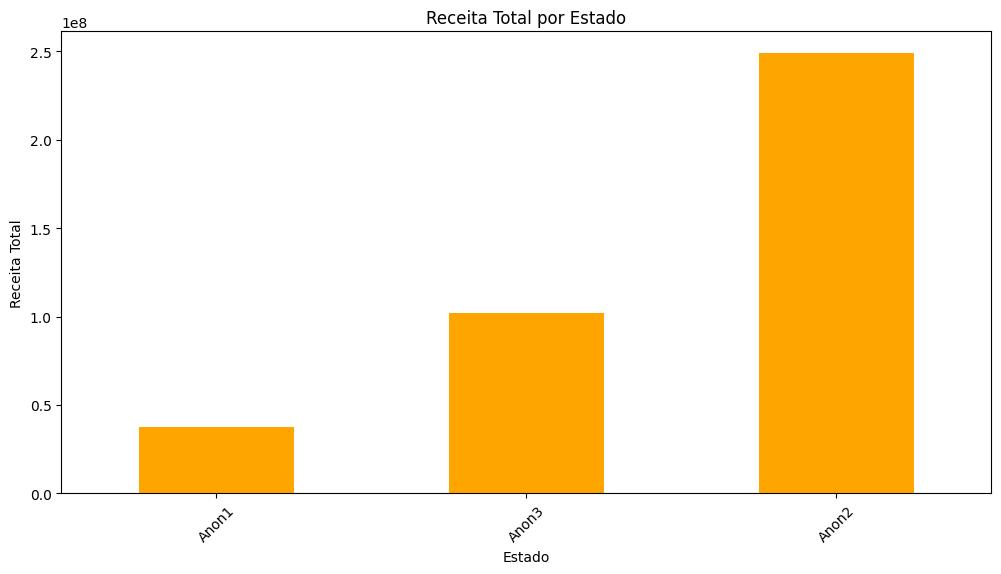

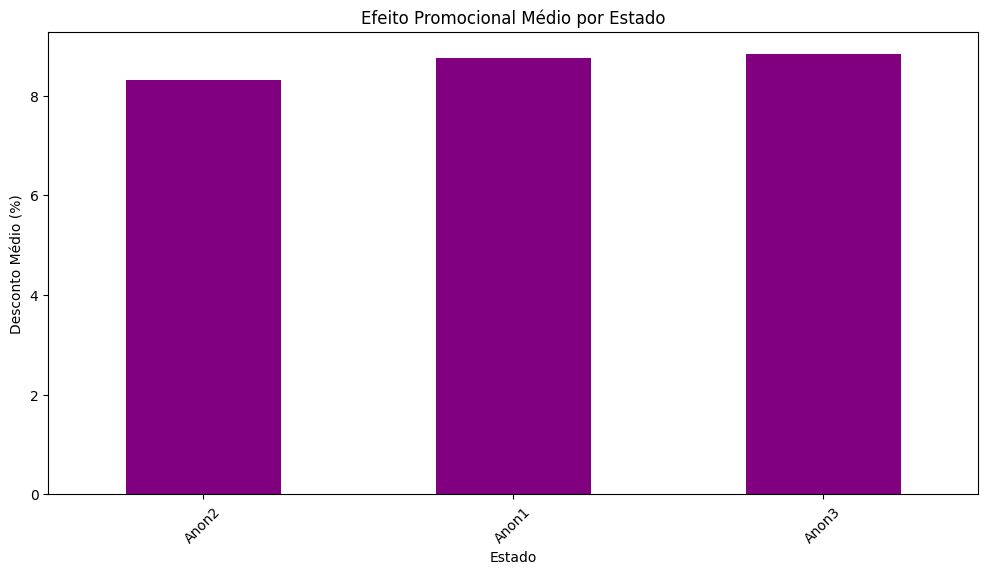

In [15]:
# Agrupar por estado e calcular a receita total
state_revenue = sales.groupby('cod_uf')['vlr_rbv_real_so_tt'].sum().sort_values()

# Visualizar
plt.figure(figsize=(12, 6))
state_revenue.plot(kind='bar', color='orange')
plt.title('Receita Total por Estado')
plt.xlabel('Estado')
plt.ylabel('Receita Total')
plt.xticks(rotation=45)
plt.show()

# Efeito promocional médio por estado
estado_desconto = sales.groupby('cod_uf')['desconto_percentual'].mean().sort_values()

# Visualizar efeito promocional por estado
plt.figure(figsize=(12, 6))
estado_desconto.plot(kind='bar', color='purple')
plt.title('Efeito Promocional Médio por Estado')
plt.xlabel('Estado')
plt.ylabel('Desconto Médio (%)')
plt.xticks(rotation=45)
plt.show()


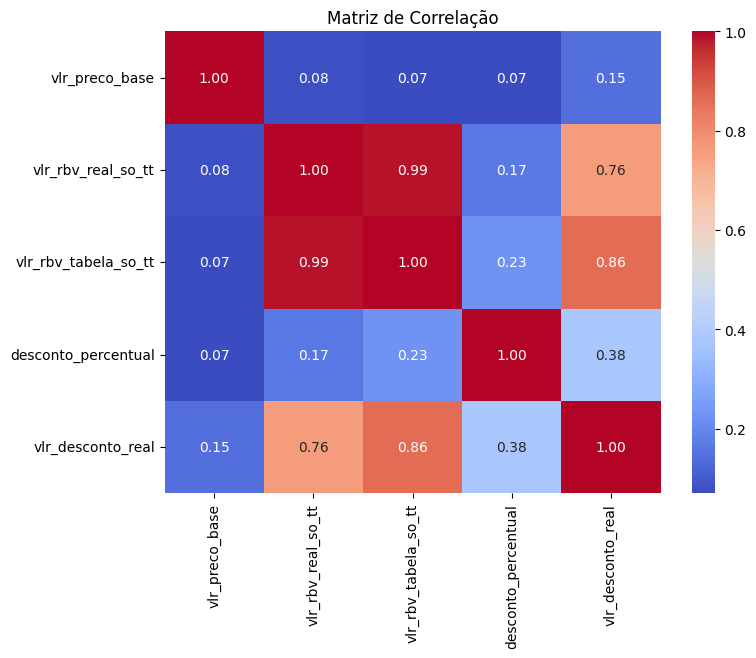

,vlr_preco_base,vlr_rbv_real_so_tt,vlr_rbv_tabela_so_tt,desconto_percentual,vlr_desconto_real
vlr_preco_base,1.000000,0.077625,0.069393,0.069284,0.145200
vlr_rbv_real_so_tt,0.077625,1.000000,0.985587,0.165021,0.763335
vlr_rbv_tabela_so_tt,0.069393,0.985587,1.000000,0.228200,0.861605
desconto_percentual,0.069284,0.165021,0.228200,1.000000,0.377625
vlr_desconto_real,0.145200,0.763335,0.861605,0.377625,1.000000


In [16]:
numerical_columns = [
    'vlr_preco_base', 
    'vlr_rbv_real_so_tt', 
    'vlr_rbv_tabela_so_tt', 
    'desconto_percentual',
    'vlr_desconto_real'
]

correlations_with_discount = sales[numerical_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlations_with_discount, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()


correlations_with_discount


## Insights da Matriz de Correlação

A matriz de correlação entre as variáveis numéricas revelou os seguintes padrões:

### 1. Relações Principais
- **`vlr_rbv_real_so_tt` e `vlr_rbv_tabela_so_tt`**:
  - Correlação muito alta (**0.99**), indicando que a receita real e a receita de tabela estão diretamente relacionadas. Isso é esperado, já que a receita real é derivada da receita de tabela ajustada pelos descontos.

- **`vlr_desconto_real` e `vlr_rbv_real_so_tt`**:
  - Correlação alta (**0.76**), mostrando que maiores descontos reais estão associados a receitas reais mais altas. Isso sugere que promoções maiores contribuem para aumentar o volume de vendas.

- **`vlr_desconto_real` e `vlr_rbv_tabela_so_tt`**:
  - Correlação muito alta (**0.86**), refletindo que os valores absolutos de desconto real dependem fortemente dos preços de tabela.

- **`desconto_percentual` e `vlr_desconto_real`**:
  - Correlação moderada (**0.37**), indicando que valores absolutos de desconto nem sempre correspondem a altos percentuais de desconto, devido à variação nos preços de tabela.

### 2. Relações Fracas
- **`vlr_preco_base` com outras variáveis**:
  - Correlações baixas, como com `vlr_rbv_real_so_tt` (**0.08**) e `vlr_desconto_real` (**0.15**). Isso sugere que o preço base não é um fator dominante na determinação da receita ou dos descontos.

### Observações
- **Impacto das Promoções**:
  - O alto impacto de **`vlr_desconto_real`** em ambas as receitas destaca a importância das promoções como um motor de vendas.
  
- **Interdependência das Receitas**:
  - A relação muito próxima entre **`vlr_rbv_real_so_tt`** e **`vlr_rbv_tabela_so_tt`** reflete como a receita real é ajustada pelas condições promocionais.


## Análise de Receita e Descontos por Categoria

### Objetivo
Entender o desempenho das categorias de produtos em termos de receita gerada e o impacto médio dos descontos aplicados, identificando as categorias mais lucrativas e sensíveis a promoções.

### Etapas da Análise
1. **Receita Real Média por Categoria**:
   - Agrupamos os dados por categoria (`des_categoria_material`) e calculamos a receita média real (`vlr_rbv_real_so_tt`) para cada uma.
   - Um gráfico de barras foi gerado para visualizar as categorias com maior receita média.

2. **Desconto Percentual Médio por Categoria**:
   - Calculamos o desconto percentual médio (`desconto_percentual`) por categoria para avaliar quais categorias recebem maiores descontos promocionais.
   - Um gráfico de barras foi gerado para comparar o impacto dos descontos entre as categorias.

### Resultados Esperados
- **Categorias com Maior Receita**:
  - As categorias que aparecem no topo do gráfico de receita média indicam produtos mais lucrativos e possivelmente com maior volume de vendas.
  
- **Categorias com Maiores Descontos**:
  - Categorias com altos descontos médios podem indicar foco promocional ou necessidade de escoar produtos.

### Interpretação
- A relação entre receita média e desconto percentual pode revelar:
  - Se categorias com maior receita dependem de grandes descontos.
  - Estratégias específicas de promoções para diferentes categorias de produtos.

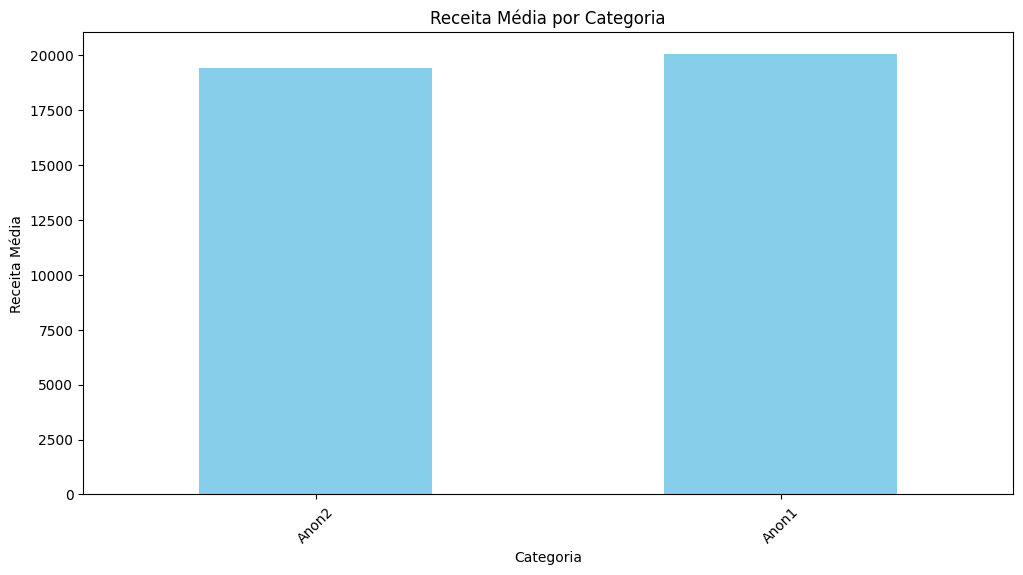

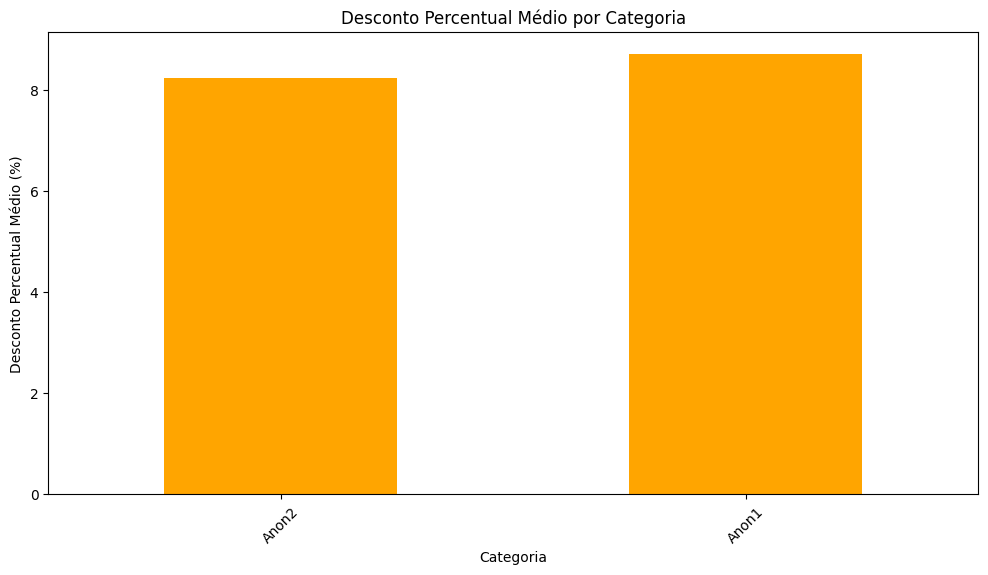

In [17]:
# Receita real média por categoria
categoria_revenue = sales.groupby('des_categoria_material')['vlr_rbv_real_so_tt'].mean()

# Visualizar receita por categoria
plt.figure(figsize=(12, 6))
categoria_revenue.sort_values().plot(kind='bar', color='skyblue')
plt.title('Receita Média por Categoria')
plt.xlabel('Categoria')
plt.ylabel('Receita Média')
plt.xticks(rotation=45)
plt.show()

# Desconto percentual médio por categoria
categoria_desconto = sales.groupby('des_categoria_material')['desconto_percentual'].mean()

# Visualizar desconto médio por categoria
plt.figure(figsize=(12, 6))
categoria_desconto.sort_values().plot(kind='bar', color='orange')
plt.title('Desconto Percentual Médio por Categoria')
plt.xlabel('Categoria')
plt.ylabel('Desconto Percentual Médio (%)')
plt.xticks(rotation=45)
plt.show()


## Análise de Receita por Mecânica Promocional

### Objetivo
Avaliar o impacto das mecânicas promocionais, tanto para consumidores quanto para revendedores, na receita gerada, identificando quais estratégias são mais eficazes para aumentar as vendas.

### Etapas da Análise
1. **Receita Média por Mecânica Promocional para Consumidores**:
   - Agrupamos os dados por tipo de mecânica promocional para consumidores (`des_mecanica_consumidor`) e calculamos a receita média real (`vlr_rbv_real_so_tt`).
   - Um gráfico de barras foi gerado para visualizar quais mecânicas têm maior impacto na receita.

2. **Receita Média por Mecânica Promocional para Revendedores**:
   - Agrupamos os dados por tipo de mecânica promocional para revendedores (`des_mecanica_rev`) e calculamos a receita média real.
   - Um gráfico de barras foi gerado para identificar as estratégias mais eficazes voltadas a revendedores.

### Resultados Esperados
- **Mecânicas Mais Lucrativas**:
  - As mecânicas com maior receita média indicam estratégias promocionais bem-sucedidas para consumidores ou revendedores.
  
- **Diferenças Entre Mecânicas**:
  - A comparação entre consumidores e revendedores pode revelar abordagens distintas que funcionam melhor para cada público.

### Interpretação
- As mecânicas promocionais que lideram em receita média podem ser priorizadas em campanhas futuras.
- Estratégias com receita média baixa podem ser revisitadas para avaliar sua efetividade.

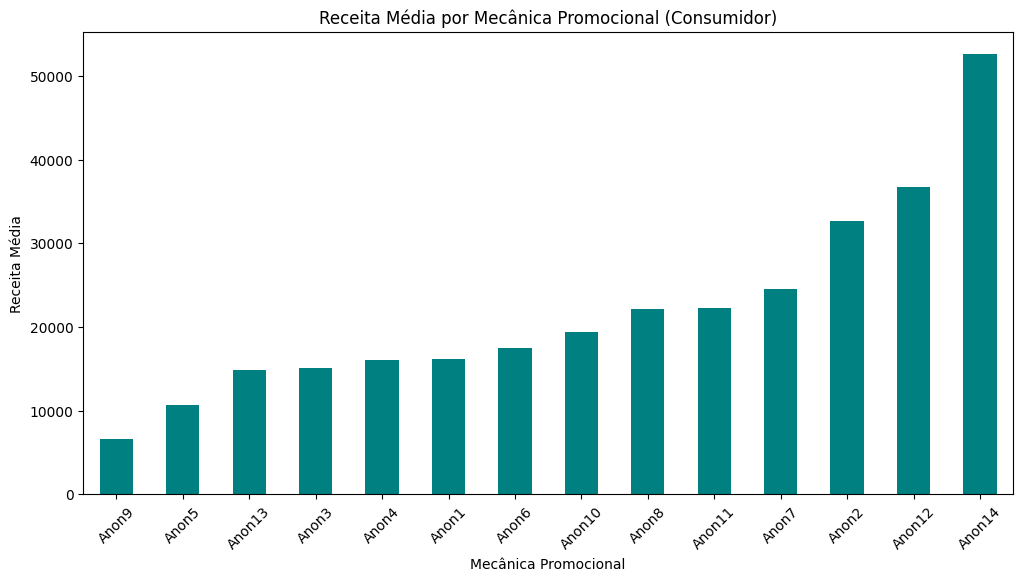

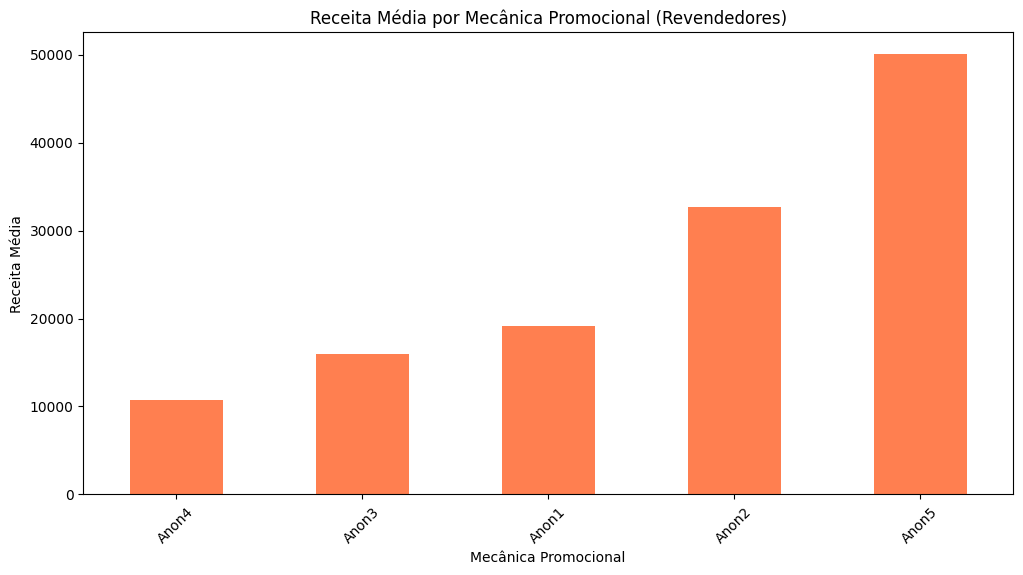

In [18]:
# Receita média por mecânica do consumidor
mecanica_consumidor = sales.groupby('des_mecanica_consumidor')['vlr_rbv_real_so_tt'].mean()

# Visualizar mecânicas do consumidor
plt.figure(figsize=(12, 6))
mecanica_consumidor.sort_values().plot(kind='bar', color='teal')
plt.title('Receita Média por Mecânica Promocional (Consumidor)')
plt.xlabel('Mecânica Promocional')
plt.ylabel('Receita Média')
plt.xticks(rotation=45)
plt.show()

# Receita média por mecânica do revendedor
mecanica_revendedor = sales.groupby('des_mecanica_rev')['vlr_rbv_real_so_tt'].mean()

# Visualizar mecânicas do revendedor
plt.figure(figsize=(12, 6))
mecanica_revendedor.sort_values().plot(kind='bar', color='coral')
plt.title('Receita Média por Mecânica Promocional (Revendedores)')
plt.xlabel('Mecânica Promocional')
plt.ylabel('Receita Média')
plt.xticks(rotation=45)
plt.show()


## Análise da Relação Não-Linear entre Desconto Real e Receita Real

### Objetivo
Investigar a relação entre o valor absoluto dos descontos reais (`vlr_desconto_real`) e a receita real (`vlr_rbv_real_so_tt`), buscando identificar padrões não-lineares que possam influenciar o comportamento de vendas.

### Etapas da Análise
1. **Dispersão Entre Desconto Real e Receita Real**:
   - Um gráfico de dispersão foi gerado para visualizar a relação entre o valor do desconto real e a receita real.
   - Cada ponto no gráfico representa uma observação no conjunto de dados.

2. **Ajuste de Regressão Não-Linear**:
   - Uma linha de regressão polinomial de ordem 2 foi ajustada aos dados para identificar padrões não-lineares entre as variáveis.

### Resultados Esperados
- **Relação Não-Linear**:
  - Identificar se há uma relação curva entre o valor do desconto e a receita, como:
    - Aumento de receita até certo ponto do desconto.
    - Diminuição no impacto do desconto após um certo valor.

- **Pontos de Saturação**:
  - Verificar se existe um ponto onde descontos adicionais deixam de gerar aumentos significativos na receita.

### Interpretação
- A análise ajudará a entender se o impacto dos descontos reais na receita segue um padrão linear ou se existem limites onde o retorno do desconto começa a diminuir.
- Pode revelar limites ideais para definir estratégias promocionais eficientes.

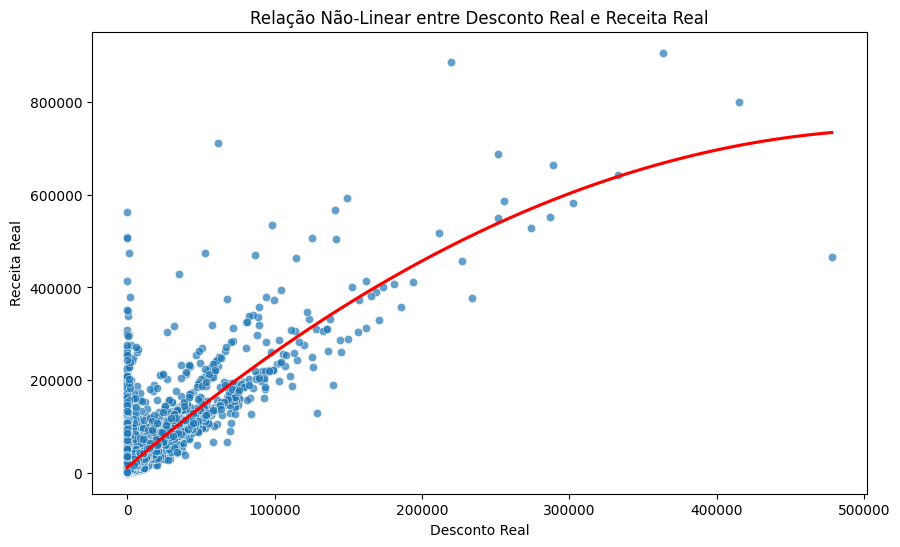

In [19]:
# Relação não-linear entre receita real e desconto real
plt.figure(figsize=(10, 6))
sns.scatterplot(x='vlr_desconto_real', y='vlr_rbv_real_so_tt', alpha=0.7, data=sales)
sns.regplot(x='vlr_desconto_real', y='vlr_rbv_real_so_tt', data=sales, scatter=False, color='red', ci=None, order=2)
plt.title('Relação Não-Linear entre Desconto Real e Receita Real')
plt.xlabel('Desconto Real')
plt.ylabel('Receita Real')
plt.show()


## Segmentação de Receita Real por Faixas

### Objetivo
Classificar os dados em faixas de receita real (`vlr_rbv_real_so_tt`) para identificar a distribuição das observações em diferentes níveis de desempenho de vendas.

### Etapas da Análise
1. **Definição de Faixas**:
   - As receitas reais foram divididas em 5 categorias:
     - **Muito Baixa**: 0 a 5,000.
     - **Baixa**: 5,000 a 20,000.
     - **Média**: 20,000 a 50,000.
     - **Alta**: 50,000 a 100,000.
     - **Muito Alta**: acima de 100,000.

2. **Classificação**:
   - Cada observação foi atribuída a uma faixa com base no valor de receita real.

3. **Visualização**:
   - Um gráfico de barras foi gerado para mostrar a frequência de observações em cada faixa.

### Resultados Esperados
- **Distribuição de Faixas**:
  - Identificar quais faixas concentram a maior parte das observações.
  - Determinar a proporção de vendas em níveis mais altos ou mais baixos de receita.

- **Identificação de Padrões**:
  - Faixas com alta concentração podem indicar produtos ou estratégias que dominam o desempenho.

### Interpretação
- As faixas de receita permitem segmentar melhor os dados para análises adicionais, como:
  - Relacionar faixas de receita com categorias de produtos.
  - Avaliar o impacto promocional em diferentes faixas.

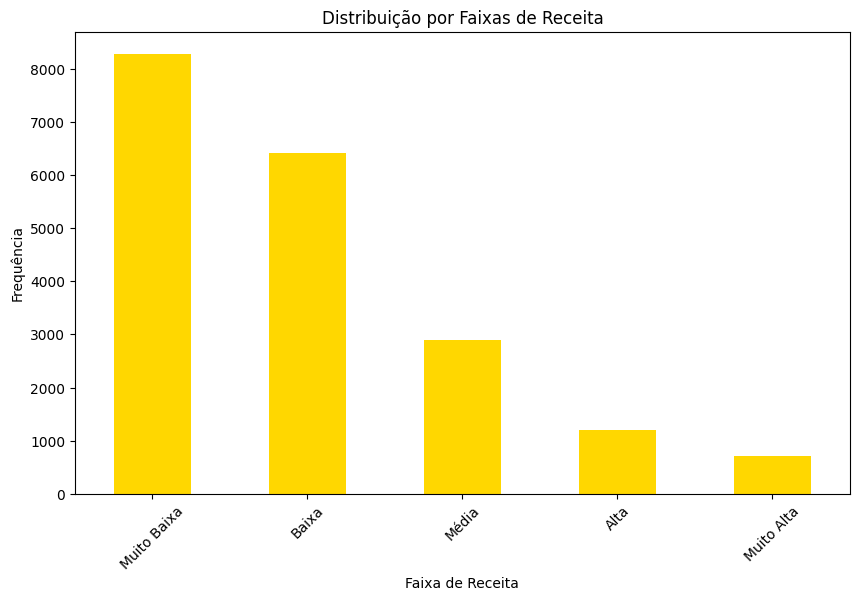

In [20]:
# Categorizar receita real
bins_receita = [0, 5000, 20000, 50000, 100000, sales['vlr_rbv_real_so_tt'].max()]
labels_receita = ['Muito Baixa', 'Baixa', 'Média', 'Alta', 'Muito Alta']
sales['faixa_receita'] = pd.cut(sales['vlr_rbv_real_so_tt'], bins=bins_receita, labels=labels_receita)

# Frequência por faixa de receita
faixa_receita_freq = sales['faixa_receita'].value_counts()

# Visualizar frequência por faixa de receita
faixa_receita_freq.plot(kind='bar', color='gold', figsize=(10, 6))
plt.title('Distribuição por Faixas de Receita')
plt.xlabel('Faixa de Receita')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.show()


## Análise de Receita por Categoria e Mecânica Promocional

### Objetivo
Examinar como diferentes categorias de produtos respondem a mecânicas promocionais específicas, tanto para consumidores quanto para revendedores, e identificar as combinações mais eficazes para gerar receita.

### Etapas da Análise
1. **Receita Média por Categoria e Mecânica Promocional (Consumidor)**:
   - Agrupamos os dados por categoria (`des_categoria_material`) e mecânica promocional do consumidor (`des_mecanica_consumidor`).
   - Calculamos a receita média real (`vlr_rbv_real_so_tt`) para cada combinação e geramos um gráfico de barras para destacar as categorias e mecânicas mais lucrativas.

2. **Receita Média por Categoria e Mecânica Promocional (Revendedor)**:
   - Agrupamos os dados por categoria e mecânica promocional do revendedor (`des_mecanica_rev`).
   - Calculamos a receita média para cada combinação e geramos um gráfico de barras similar ao anterior.

### Resultados Esperados
- **Identificação de Mecânicas Eficazes**:
  - Determinar quais mecânicas promocionais têm maior impacto na receita dentro de cada categoria.
  
- **Diferenças Entre Consumidores e Revendedores**:
  - Comparar como categorias específicas respondem de forma diferente às mecânicas voltadas para consumidores e revendedores.

### Interpretação
- As categorias com maior receita em mecânicas específicas indicam onde concentrar esforços promocionais.
- Diferenças entre consumidores e revendedores podem revelar a necessidade de estratégias separadas para cada público.

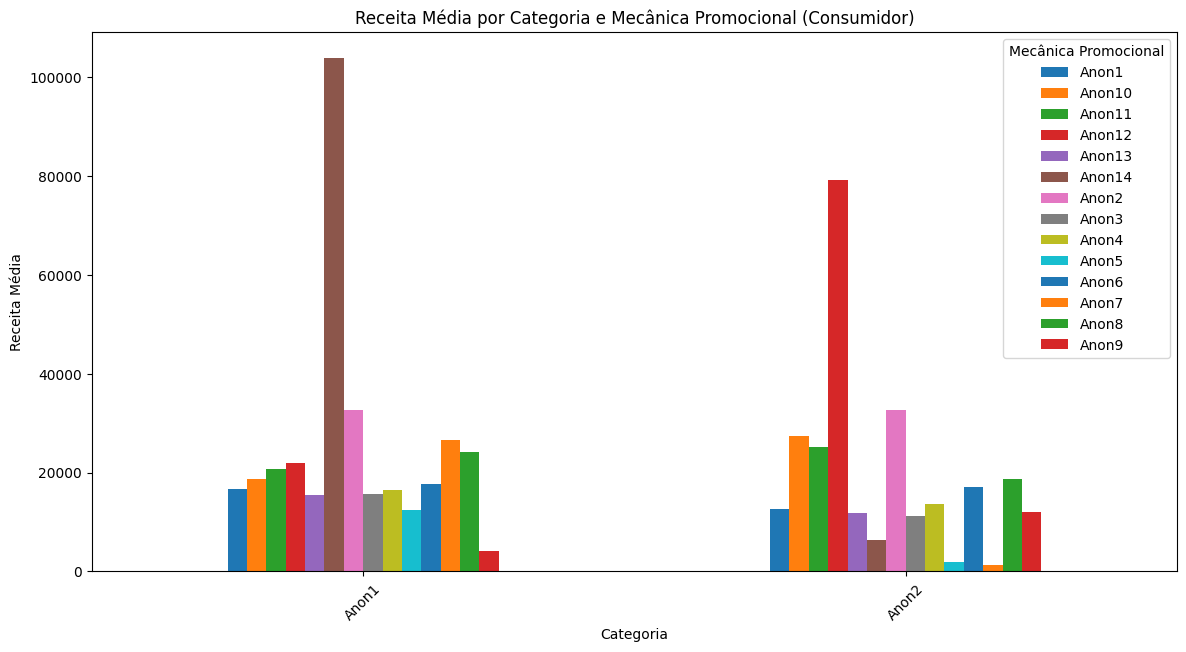

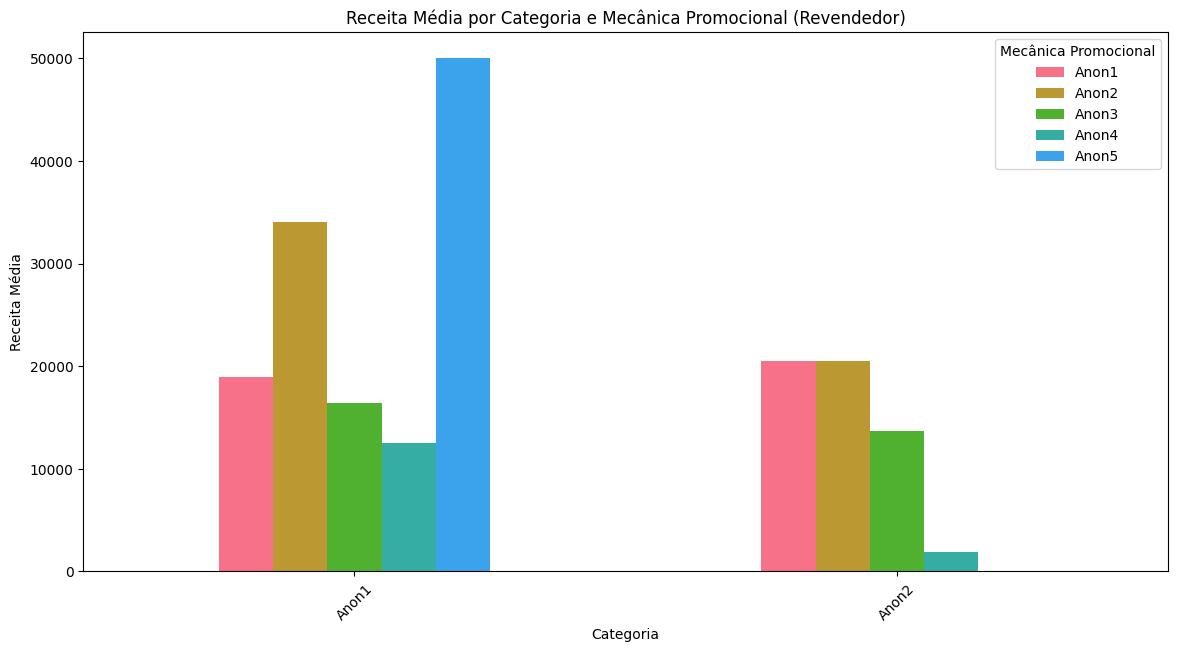

In [21]:
# Receita média por categoria e mecânica promocional (consumidor)
categoria_mecanica_consumidor = sales.groupby(['des_categoria_material', 'des_mecanica_consumidor'])['vlr_rbv_real_so_tt'].mean().unstack()

# Visualizar receita média por categoria e mecânica (consumidor)
categoria_mecanica_consumidor.plot(kind='bar', figsize=(14, 7))
plt.title('Receita Média por Categoria e Mecânica Promocional (Consumidor)')
plt.xlabel('Categoria')
plt.ylabel('Receita Média')
plt.legend(title='Mecânica Promocional')
plt.xticks(rotation=45)
plt.show()

# Receita média por categoria e mecânica promocional (revendedor)
categoria_mecanica_rev = sales.groupby(['des_categoria_material', 'des_mecanica_rev'])['vlr_rbv_real_so_tt'].mean().unstack()

# Visualizar receita média por categoria e mecânica (revendedor)
categoria_mecanica_rev.plot(kind='bar', figsize=(14, 7), color=sns.color_palette('husl'))
plt.title('Receita Média por Categoria e Mecânica Promocional (Revendedor)')
plt.xlabel('Categoria')
plt.ylabel('Receita Média')
plt.legend(title='Mecânica Promocional')
plt.xticks(rotation=45)
plt.show()


## Análise de Faixas de Receita e Descontos por Estado

### Objetivo
Explorar como as faixas de receita real (`faixa_receita`) estão distribuídas entre os estados (`cod_uf`) e analisar os descontos percentuais médios aplicados em cada faixa, destacando padrões regionais e estratégias promocionais.

### Etapas da Análise
1. **Distribuição de Faixas de Receita por Estado**:
   - Agrupamos os dados por estado e faixa de receita.
   - Calculamos a frequência de observações em cada faixa de receita para cada estado.
   - Um gráfico de barras empilhadas foi gerado para mostrar a contribuição de cada faixa por estado.

2. **Desconto Médio por Faixa de Receita e Estado**:
   - Calculamos o desconto percentual médio (`desconto_percentual`) para cada combinação de estado e faixa de receita.
   - Um gráfico de barras foi gerado para comparar os descontos médios aplicados em diferentes faixas de receita por estado.

### Resultados Esperados
- **Distribuição de Faixas**:
  - Identificar quais estados têm maior concentração de vendas em faixas mais altas ou mais baixas de receita.
  - Destacar diferenças regionais no comportamento de vendas.

- **Descontos Regionais**:
  - Estados que aplicam maiores descontos podem estar focando em promoções para aumentar vendas em faixas específicas.
  - Estados com menores descontos em faixas altas podem ter menor dependência de promoções.

### Interpretação
- Estados com maior frequência em faixas de receita alta são potenciais líderes de mercado.
- Descontos percentuais mais altos em determinadas faixas podem indicar estratégias promocionais regionais específicas.

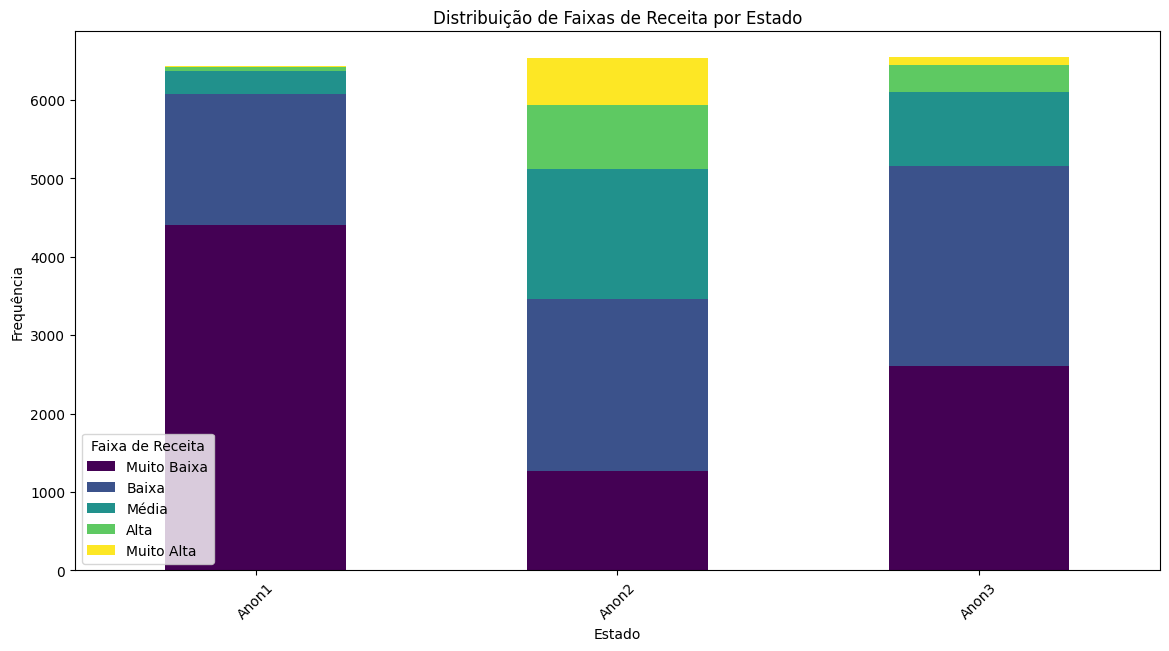

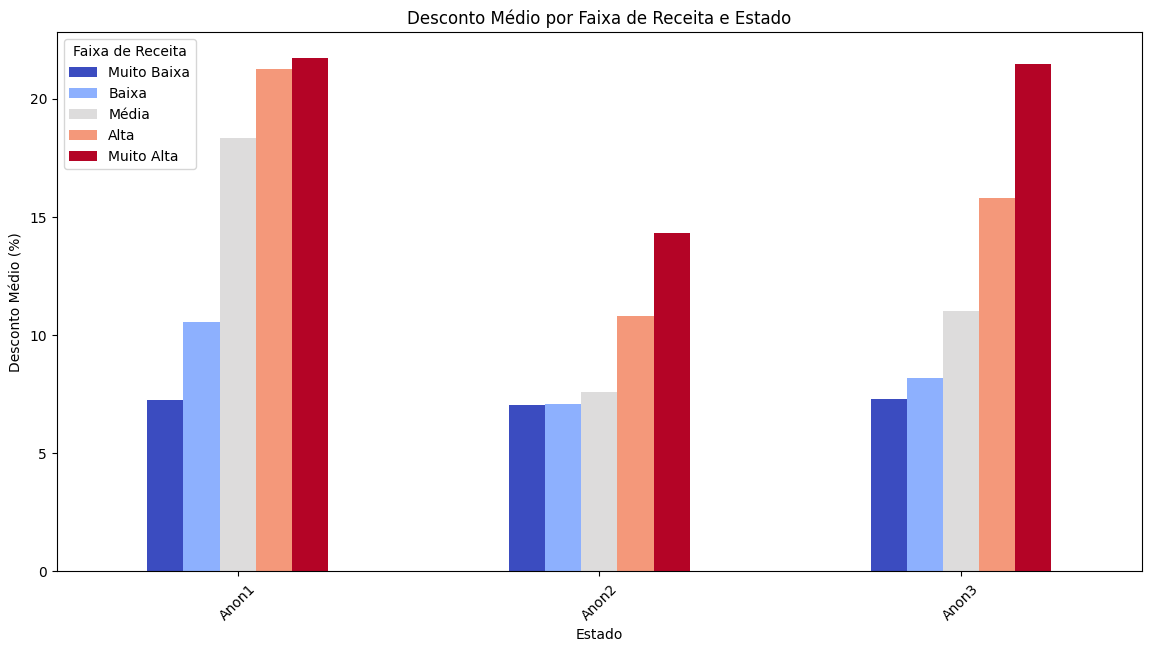

In [22]:
# Frequência de faixas de receita por estado
faixa_estado = sales.groupby(['cod_uf', 'faixa_receita']).size().unstack()

# Visualizar frequência de faixas de receita por estado
faixa_estado.plot(kind='bar', stacked=True, figsize=(14, 7), cmap='viridis')
plt.title('Distribuição de Faixas de Receita por Estado')
plt.xlabel('Estado')
plt.ylabel('Frequência')
plt.legend(title='Faixa de Receita')
plt.xticks(rotation=45)
plt.show()

# Desconto médio por faixa de receita e estado
desconto_estado_faixa = sales.groupby(['cod_uf', 'faixa_receita'])['desconto_percentual'].mean().unstack()

# Visualizar desconto médio por faixa de receita e estado
desconto_estado_faixa.plot(kind='bar', figsize=(14, 7), cmap='coolwarm')
plt.title('Desconto Médio por Faixa de Receita e Estado')
plt.xlabel('Estado')
plt.ylabel('Desconto Médio (%)')
plt.legend(title='Faixa de Receita')
plt.xticks(rotation=45)
plt.show()


## Conclusões da Análise Exploratória

### 1. Receita Média por Categoria
- Identificamos as categorias de produtos com maior receita média, que são as mais lucrativas e devem ser priorizadas em estratégias promocionais.
- Algumas categorias apresentam receita média significativamente mais baixa, o que pode indicar necessidade de ajustes em preços, promoções ou foco de mercado.

---

### 2. Receita Média por Mecânica Promocional (Consumidor)
- Certas mecânicas promocionais se destacam em termos de receita média, sugerindo que são mais eficazes para consumidores.
- Essas mecânicas podem ser priorizadas para otimizar os resultados em campanhas futuras.

---

### 3. Relação Não-Linear entre Desconto Real e Receita Real
- Observamos uma relação não-linear, onde descontos maiores nem sempre resultam em aumentos proporcionais na receita.
- Essa análise destaca a importância de identificar um ponto ideal de desconto para maximizar a receita sem comprometer margens.

---

### 4. Distribuição de Faixas de Receita por Estado
- Estados com maior concentração em faixas de receita alta podem ser considerados mercados prioritários.
- Estados em faixas de receita baixa podem exigir estratégias promocionais mais agressivas para aumentar o desempenho.

---

### 5. Desconto Médio por Faixa de Receita e Estado
- Os descontos variam consideravelmente entre estados e faixas de receita, indicando que as estratégias promocionais são regionais.
- Ajustar os descontos com base nas faixas de receita pode ajudar a melhorar o ROI das promoções.

---

### Próximos Passos
Com base nas conclusões acima:
1. Consolidar os insights em um relatório para comunicação com stakeholders.
2. Iniciar a modelagem preditiva com o objetivo de prever métricas-chave, como receita real ou impacto promocional.
3. Explorar ajustes específicos em estratégias regionais, por categoria e mecânica promocional para maximizar os resultados.
